In [1]:
import string
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(neurons):
    colors = ['mediumseagreen', 'crimson', 'cornflowerblue']
    plt.figure(figsize=(10, 4))
    for neuron in neurons:
        plt.plot(neurons[neuron].history, label=neuron, color=colors.pop(0))
    plt.xlabel('time')
    plt.ylabel('potential')
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()
    
def random(r=1):
    return (np.random.rand() - 0.5) * r

In [3]:
class Neuron:
    def __init__(self, type='hid'):
        self.type = type
        self.t = 0.0 # threshold potential
        self.p = -1.0 # resting potential
        self.min_p = -2.0 # minimum potential
        self.a = False # action potential
        self.history = []
        self.count = 0
    def update(self, s):
        if self.p < self.t:
            self.p += s # graded potential
            self.p = max(self.min_p, min(self.p, self.t))
            self.a = False
        elif self.p == self.t:
            self.p += 8.0 # depolarization
            self.a = True
            self.count += 1
        elif self.p > self.t:
            self.p -= 3.0 # repolarization
        self.history.append(self.p)

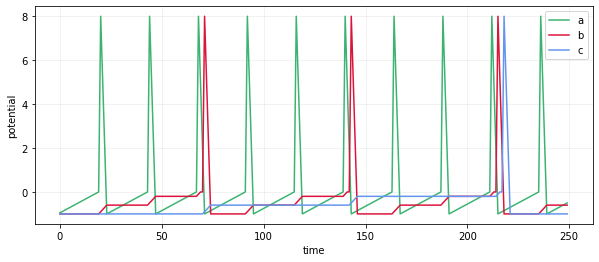

In [4]:
neurons = {'a': Neuron('in'),
           'b': Neuron(),
           'c': Neuron('out')}

connections = [('a', 'b', 0.1),
               ('b', 'c', 0.1)]

for t in range(250):
    neurons['a'].update(0.05)
    for neuron in neurons:
        if not neurons[neuron].type == 'in':
            s = 0.0
            for c in connections:
                if (c[1] == neuron) and (neurons[c[0]].a):
                    s += c[2]
            neurons[neuron].update(s)
            
plot(neurons)